# Examining conformance on the whole set

## Import packages

In [1]:
import pandas as pd
import pm4py
from pm4py.objects.conversion.log import converter as convertor
from pm4py.util import constants
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner 
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer
from pm4py.customized import conformance_extensions as conf_extension
import importlib
import numpy as np
import os

In [2]:
## Load graphviz enviroment
os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

## Import and prepare data

In [17]:
## Log data
diagnoses_data = pd.read_csv('Data/final_diagnoses_set.csv', index_col = 0)

In [4]:
## Guidelines
guidelines = pd.read_csv('Data/guidelines.csv', index_col = 0, sep = ';')
guidelines = guidelines.reset_index()

In [5]:
## Transform the logs in the correct formaat
diagnoses_data = diagnoses_data[['case:concept:name', 'new:event:concept:name','time:timestamp']]
diagnoses_data.rename(columns={'new:event:concept:name':'concept:name'}, inplace = True)
#plaveiselcelca_pm_unique = plaveiselcelca_pm_unique.drop_duplicates(subset=['case:concept:name','concept:name'])
diagnoses_data = diagnoses_data.sort_values(by = ['case:concept:name', 'time:timestamp'])

## Basic heuristic miner from PM4Py

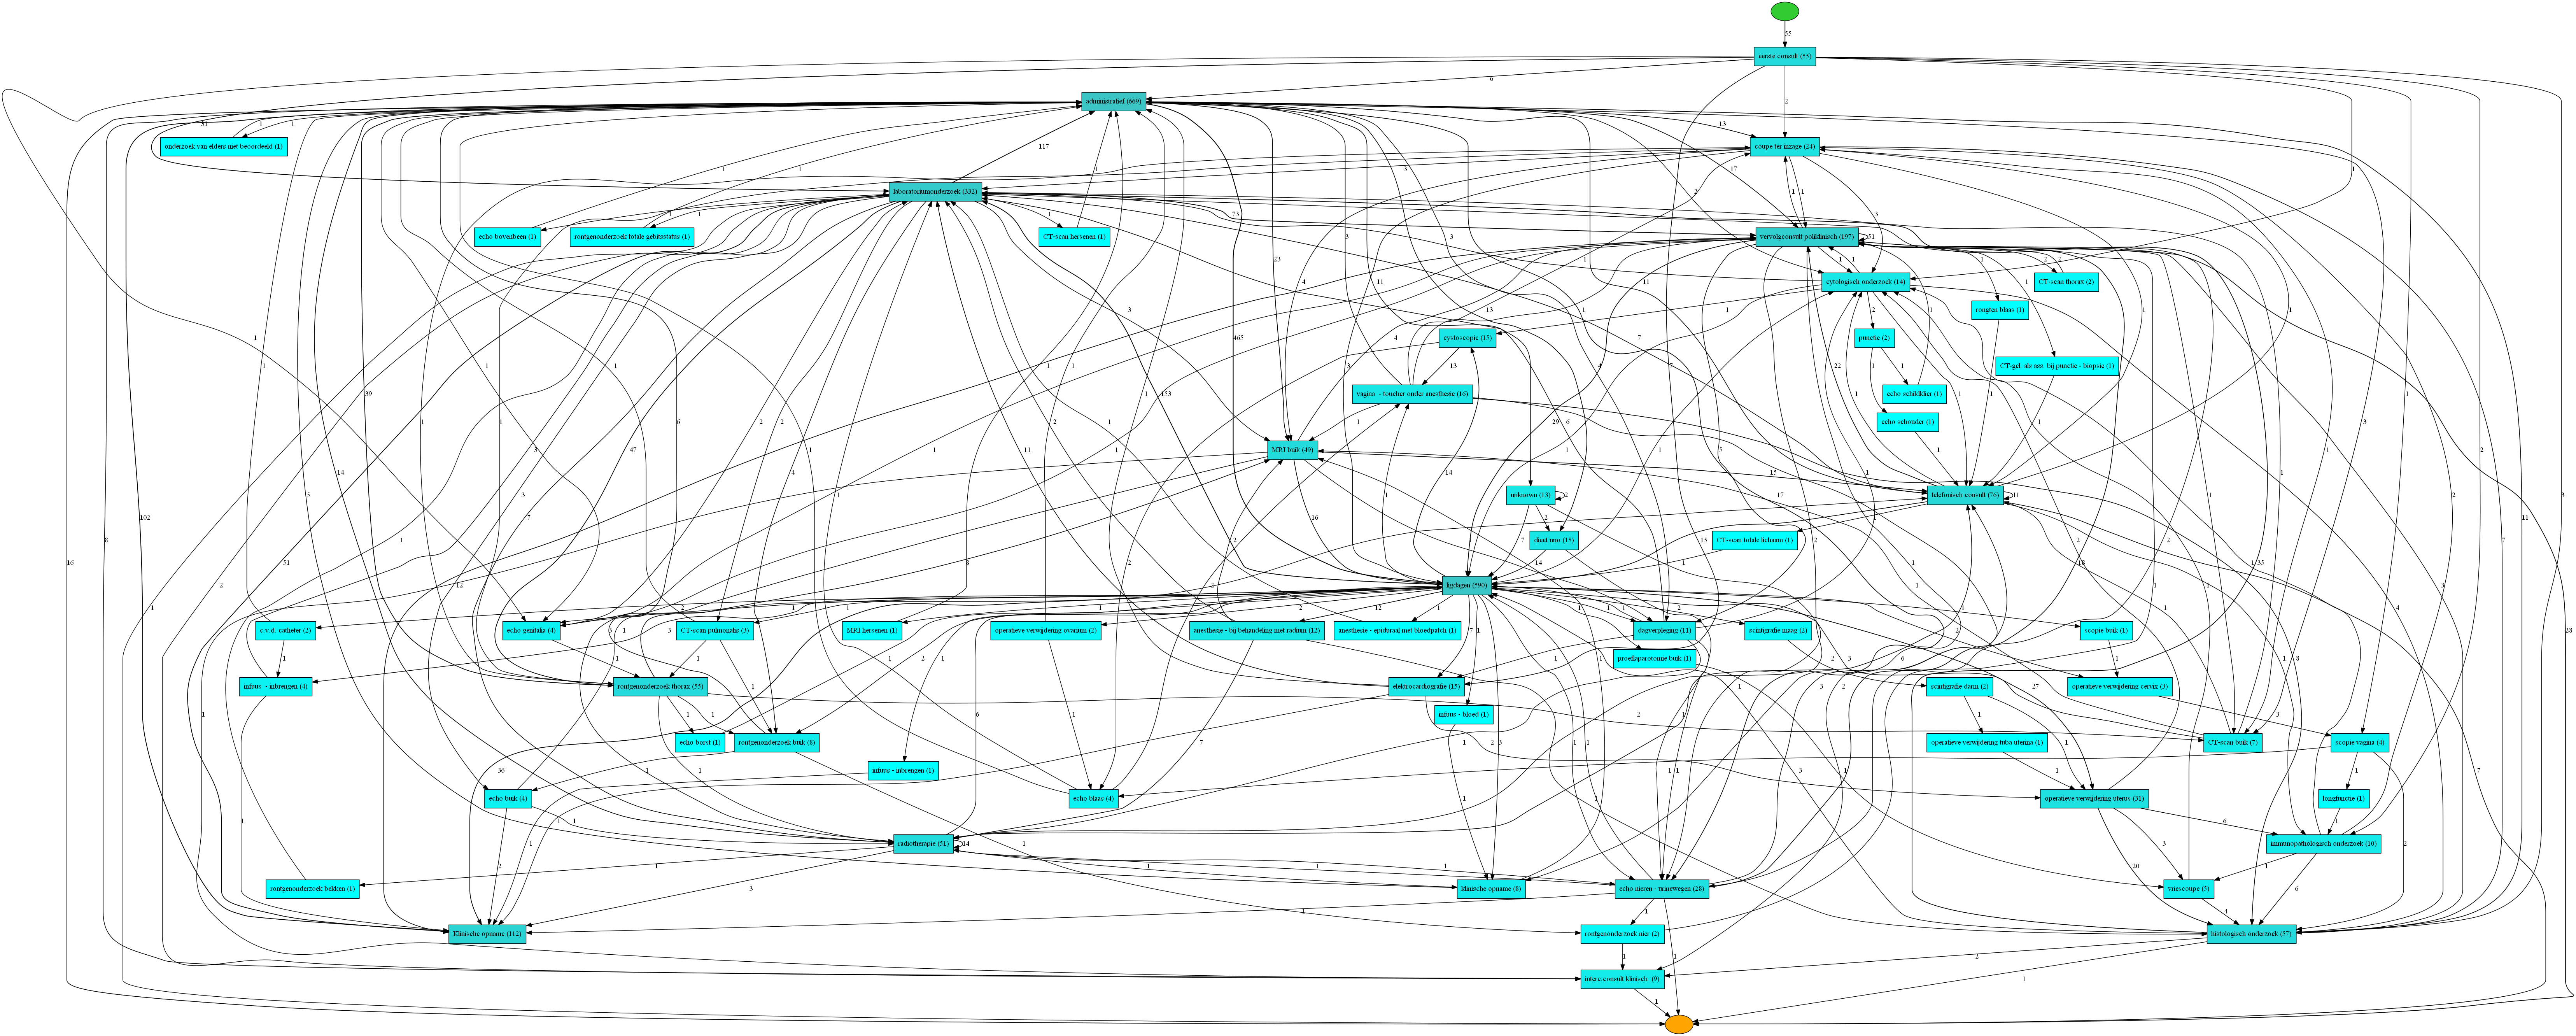

Aantal traces: 54


In [6]:
vis, table, traces = conf_extension.heu_ext(diagnoses_data, guidelines, 'basic')
hn_visualizer.view(vis)
print(traces)

## Extension 'guidelines'


   other activity
   guideline



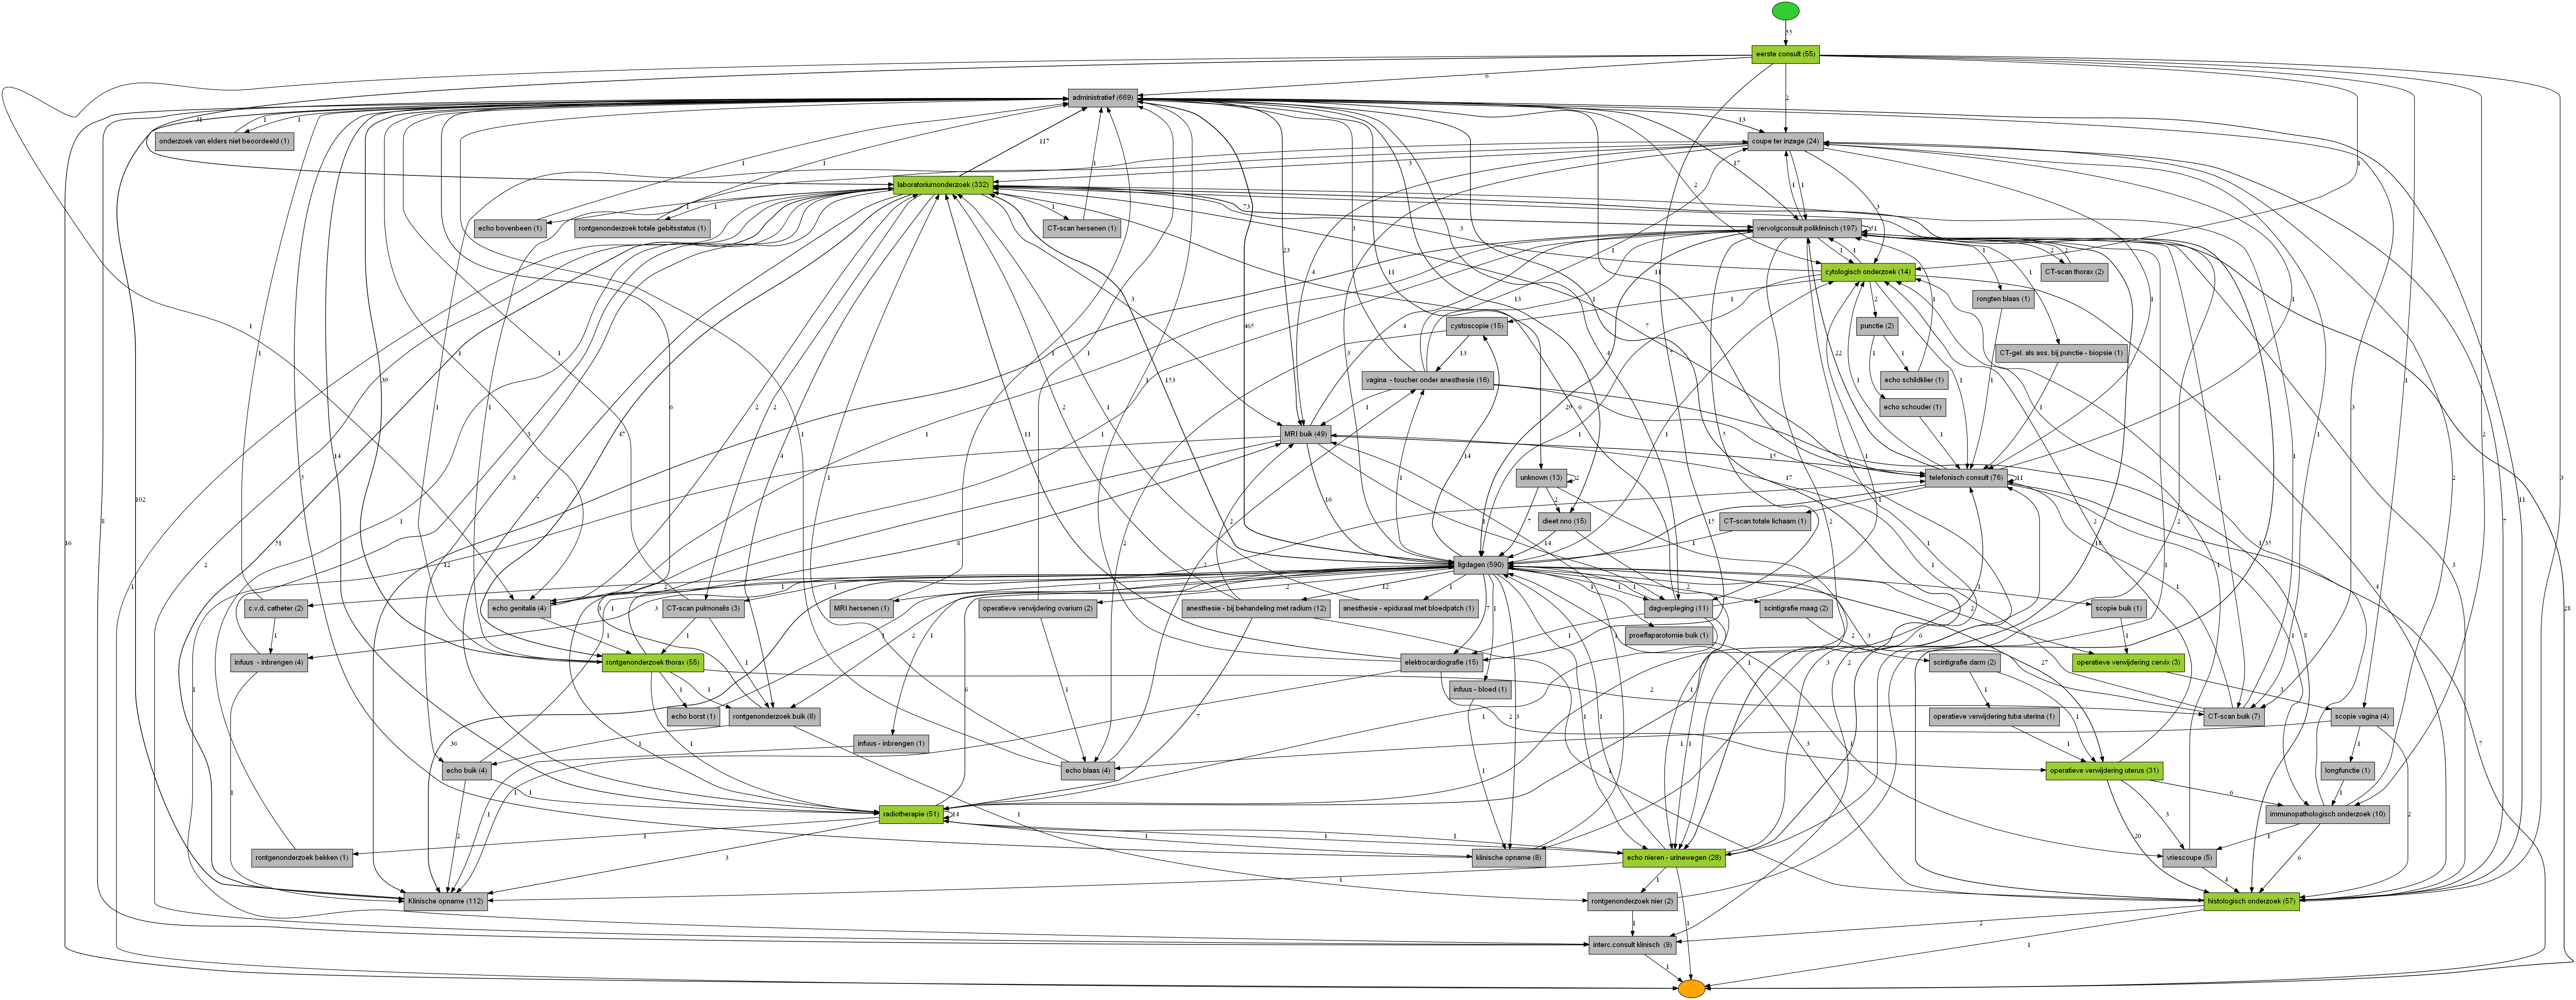

Aantal traces: 54


'Number of guideline activities in logfiles: 9, total number of guidelines: 11 (82.0%)'

In [7]:
vis, table, traces = conf_extension.heu_ext(diagnoses_data, guidelines, 'guidelines')
hn_visualizer.view(vis)
print(traces)
table

## Extension 'detail'

### Suboption 'type'


   behandeling
   diagnose



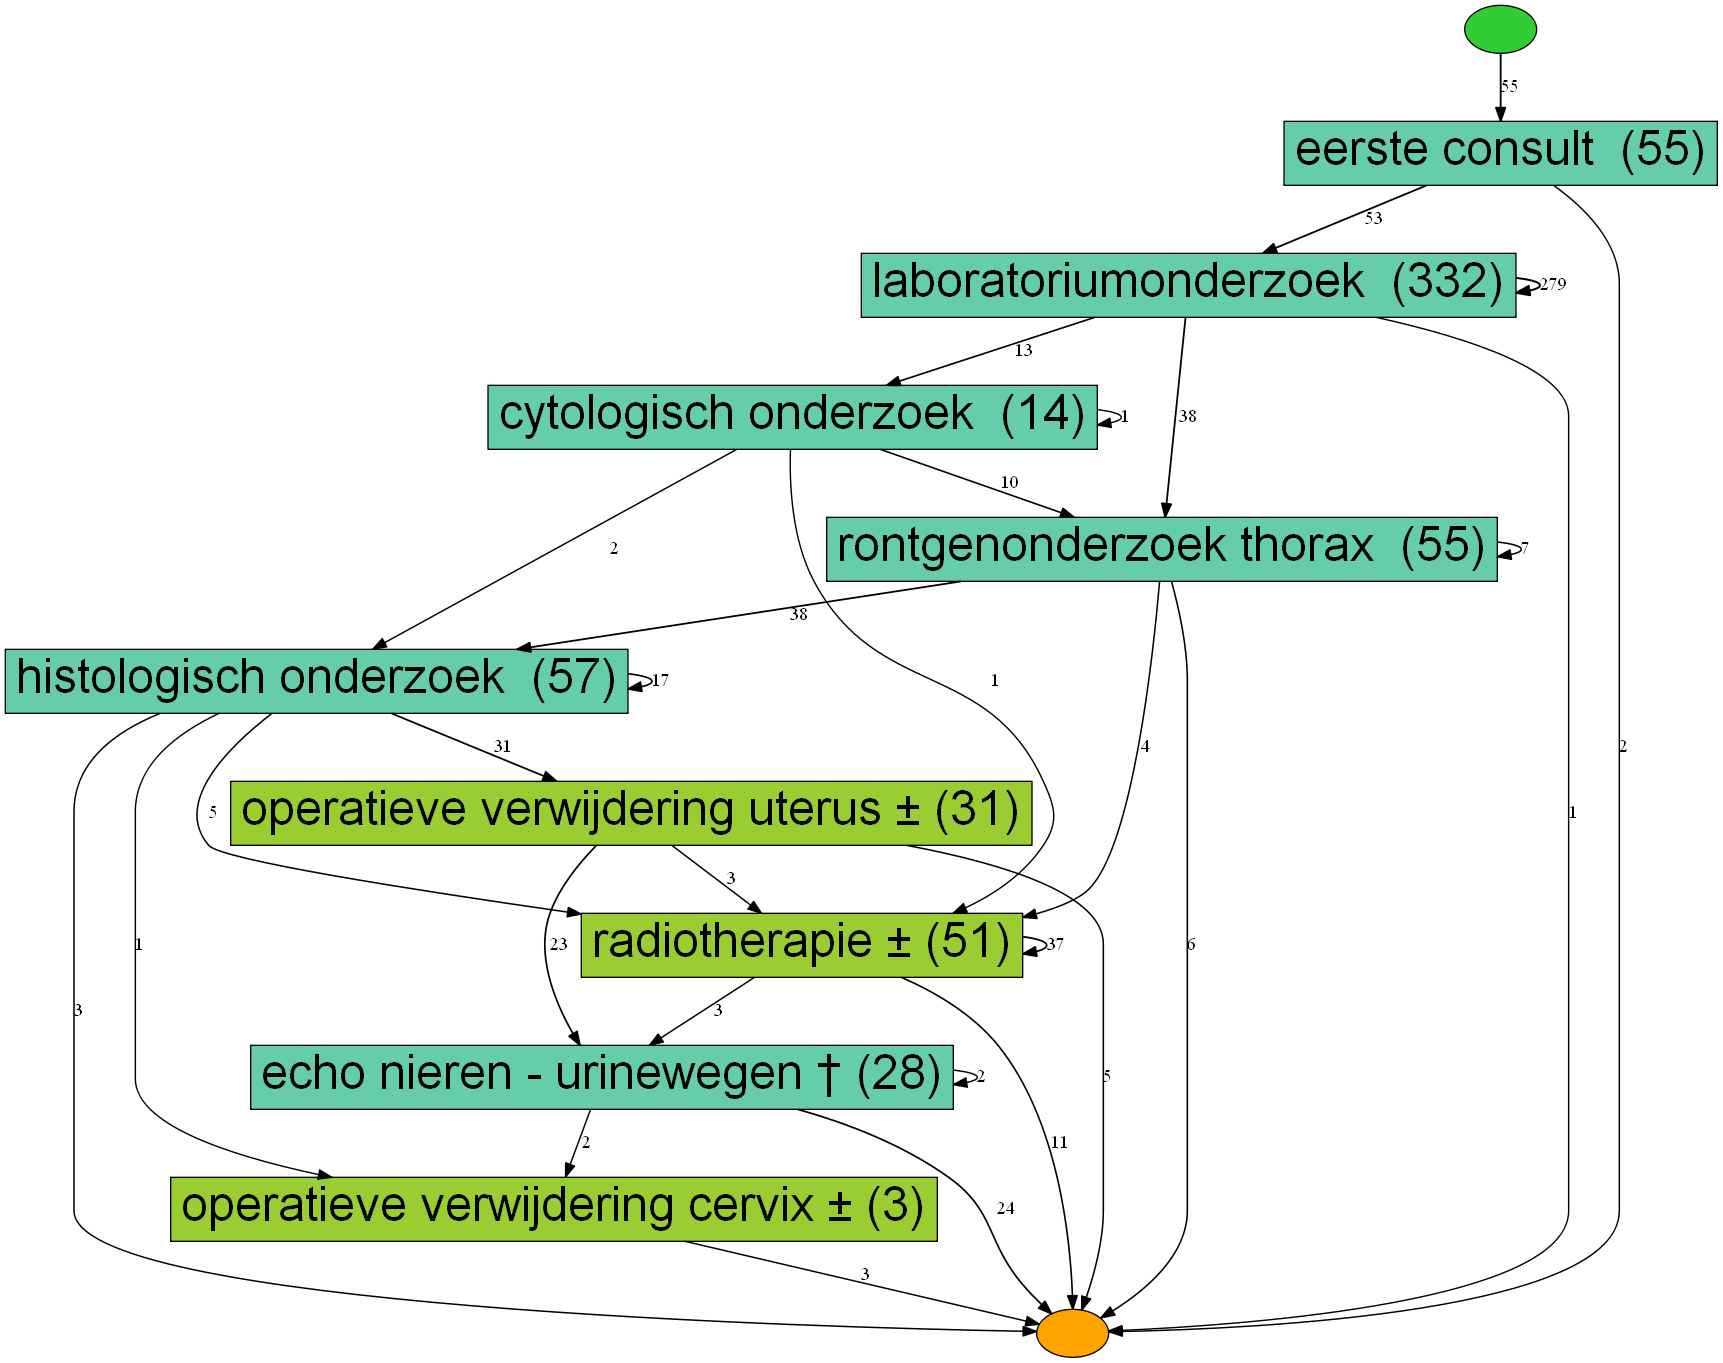

Aantal traces: 46


event         type interchangeable
0         CT-scan nieren - urinewegen †     diagnose             yes
1  operatieve verwijding lymfeklieren ±  behandeling             yes

In [8]:
vis, table, traces = conf_extension.heu_ext(diagnoses_data, guidelines, 'detail', suboption='type')
hn_visualizer.view(vis)
print(traces)
table

### Suboption 'recommended'


   optional
   recommended



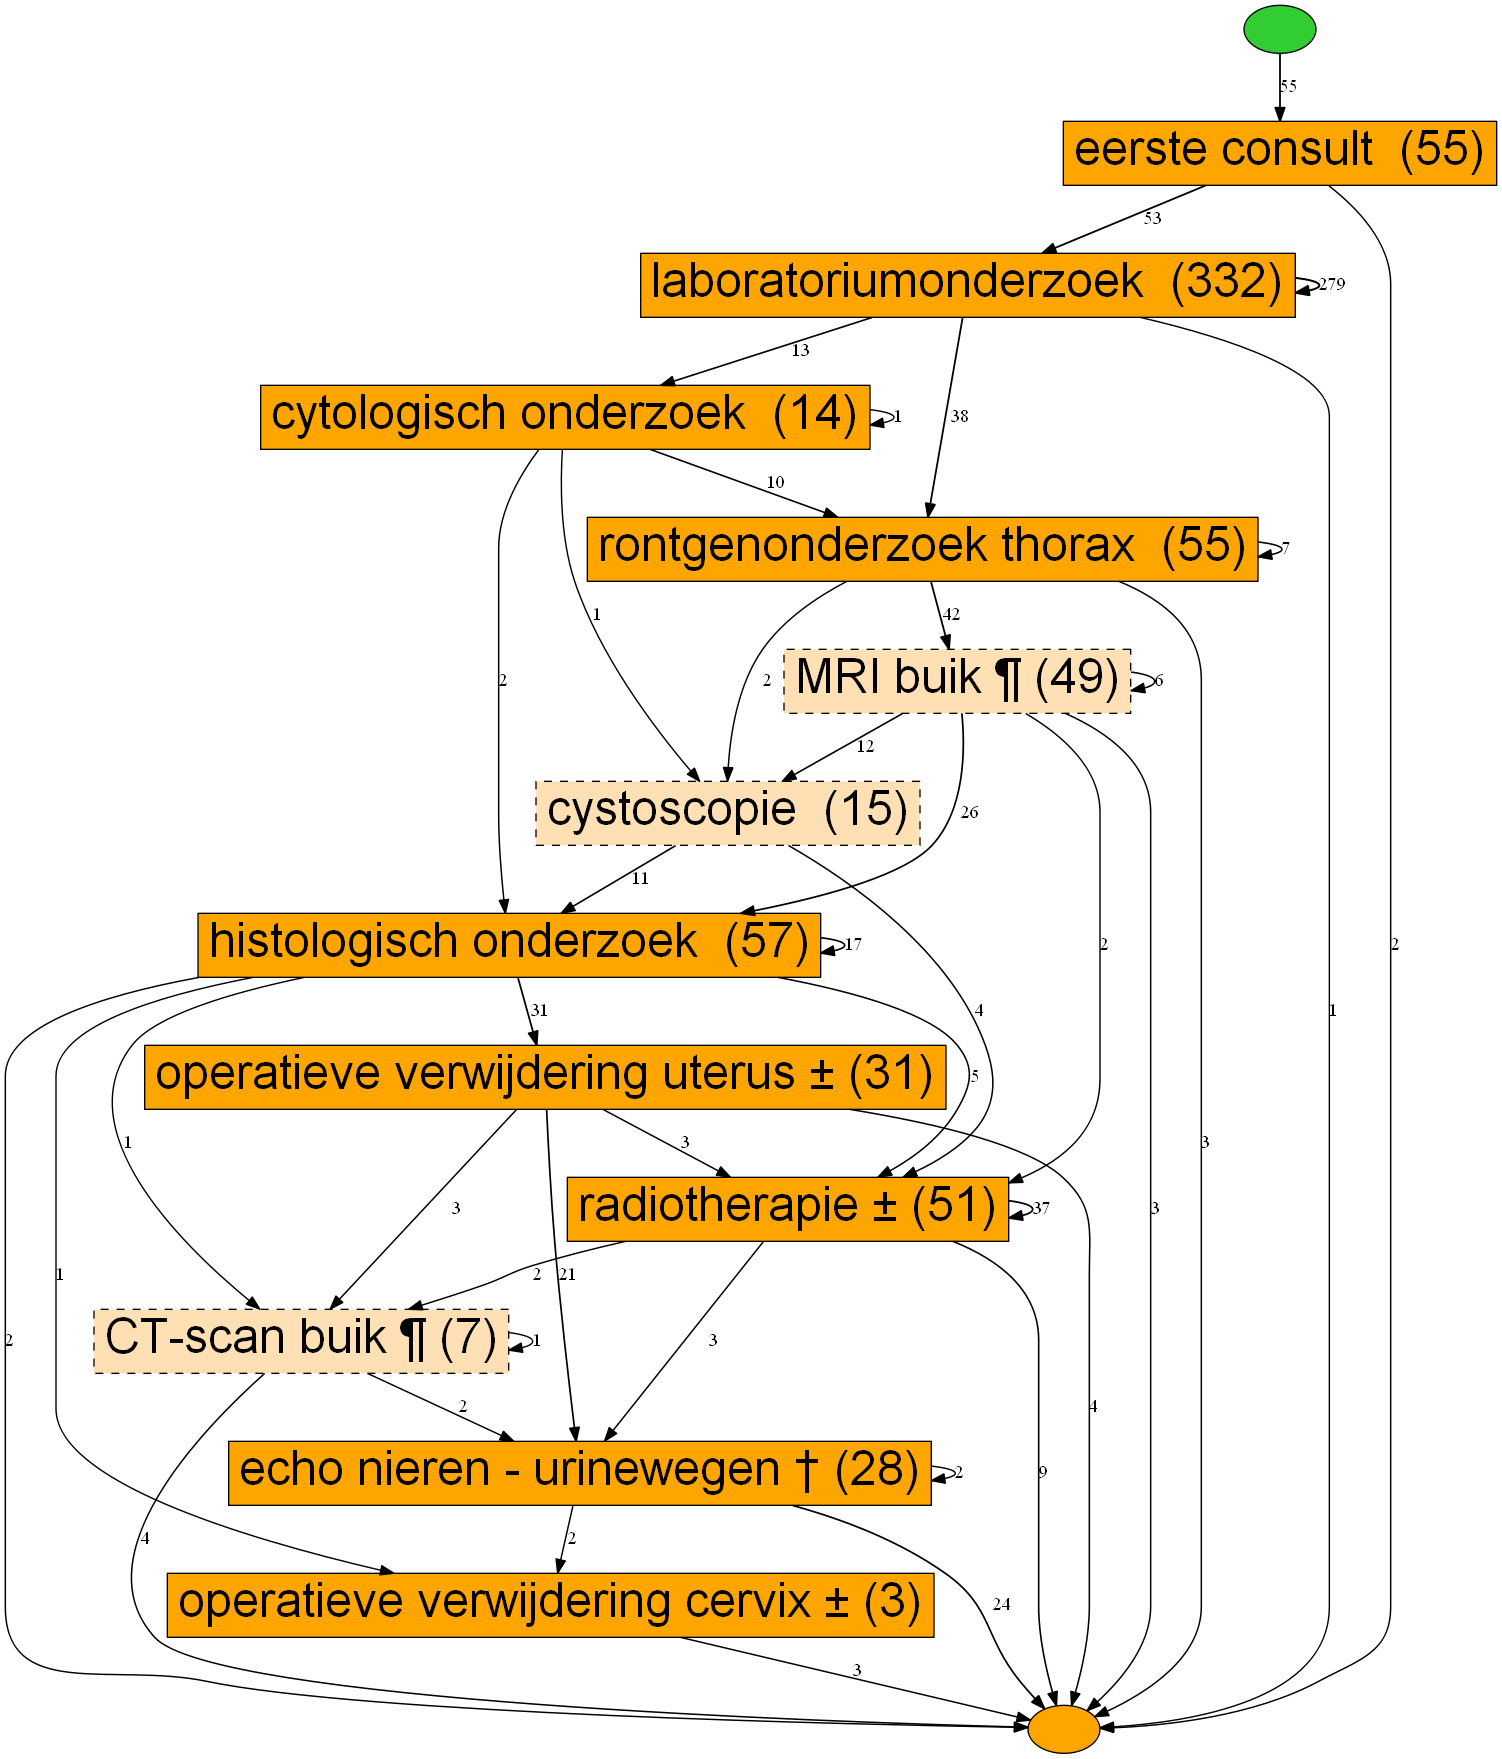

Aantal traces: 48


event         type  recommended  \
0                         proctoscopie      diagnose     optional   
1                         hyperthermie   behandeling     optional   
2                        chemotherapie   behandeling     optional   
3         CT-scan nieren - urinewegen †     diagnose  recommended   
4  operatieve verwijding lymfeklieren ±  behandeling  recommended   

  interchangeable  
0              no  
1              no  
2              no  
3             yes  
4             yes

In [9]:
vis, table, traces = conf_extension.heu_ext(diagnoses_data, guidelines, 'detail', suboption='recommended')
hn_visualizer.view(vis)
print(traces)
table

## Suboption 'combined'


   diagnose, recommended
   diagnose, optional
   behandeling, recommended



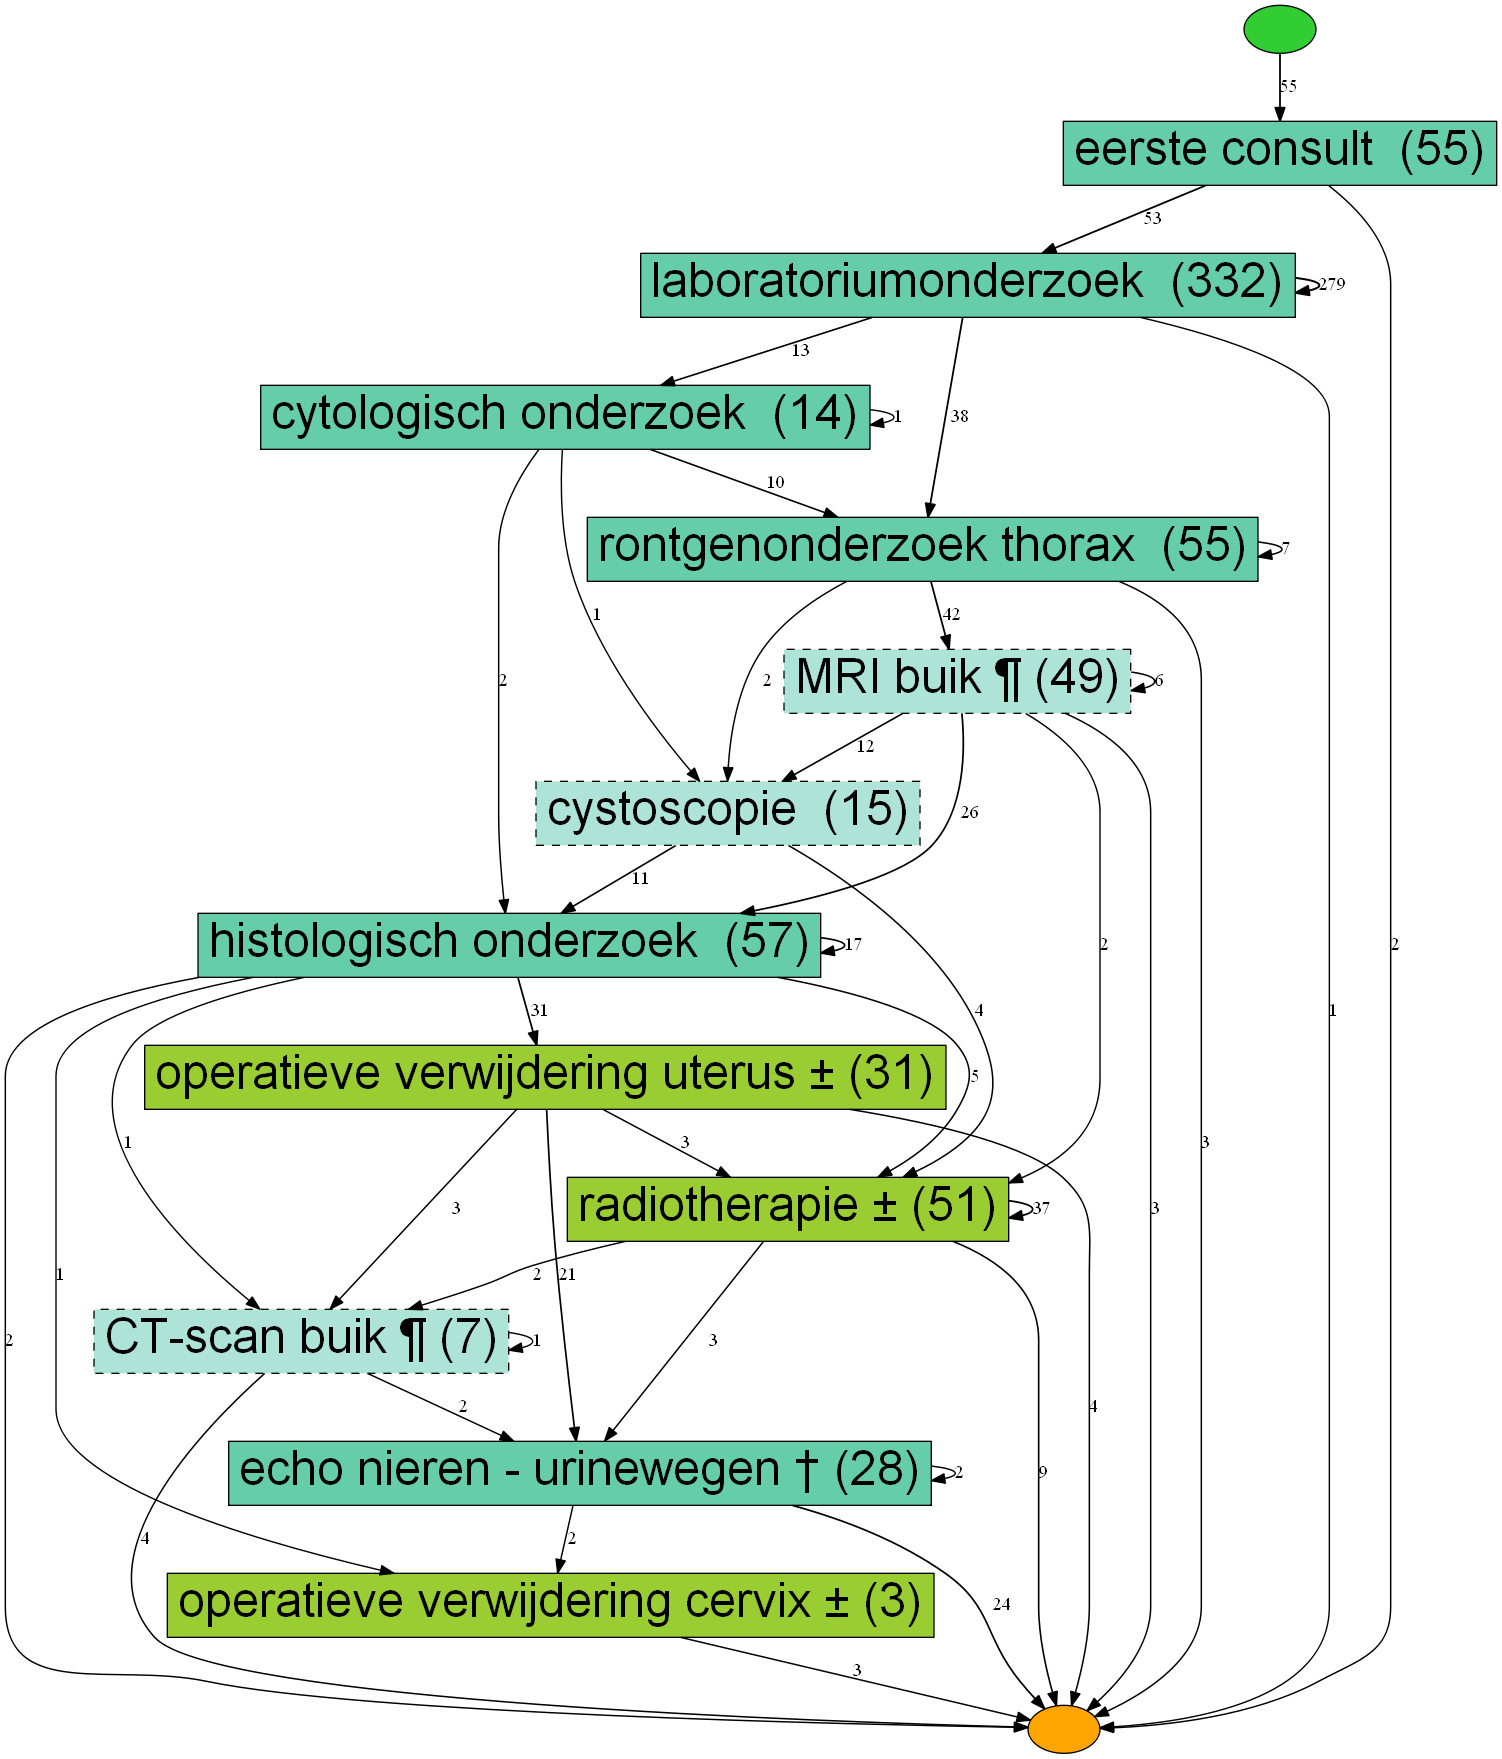

Aantal traces: 48


event         type  recommended  \
0                         proctoscopie      diagnose     optional   
1                         hyperthermie   behandeling     optional   
2                        chemotherapie   behandeling     optional   
3         CT-scan nieren - urinewegen †     diagnose  recommended   
4  operatieve verwijding lymfeklieren ±  behandeling  recommended   

  interchangeable  
0              no  
1              no  
2              no  
3             yes  
4             yes

In [10]:
vis, table, traces = conf_extension.heu_ext(diagnoses_data, guidelines, 'detail', suboption='combined')
hn_visualizer.view(vis)
print(traces)
table

## Extension 'activity conformance'


   behandeling
   diagnose



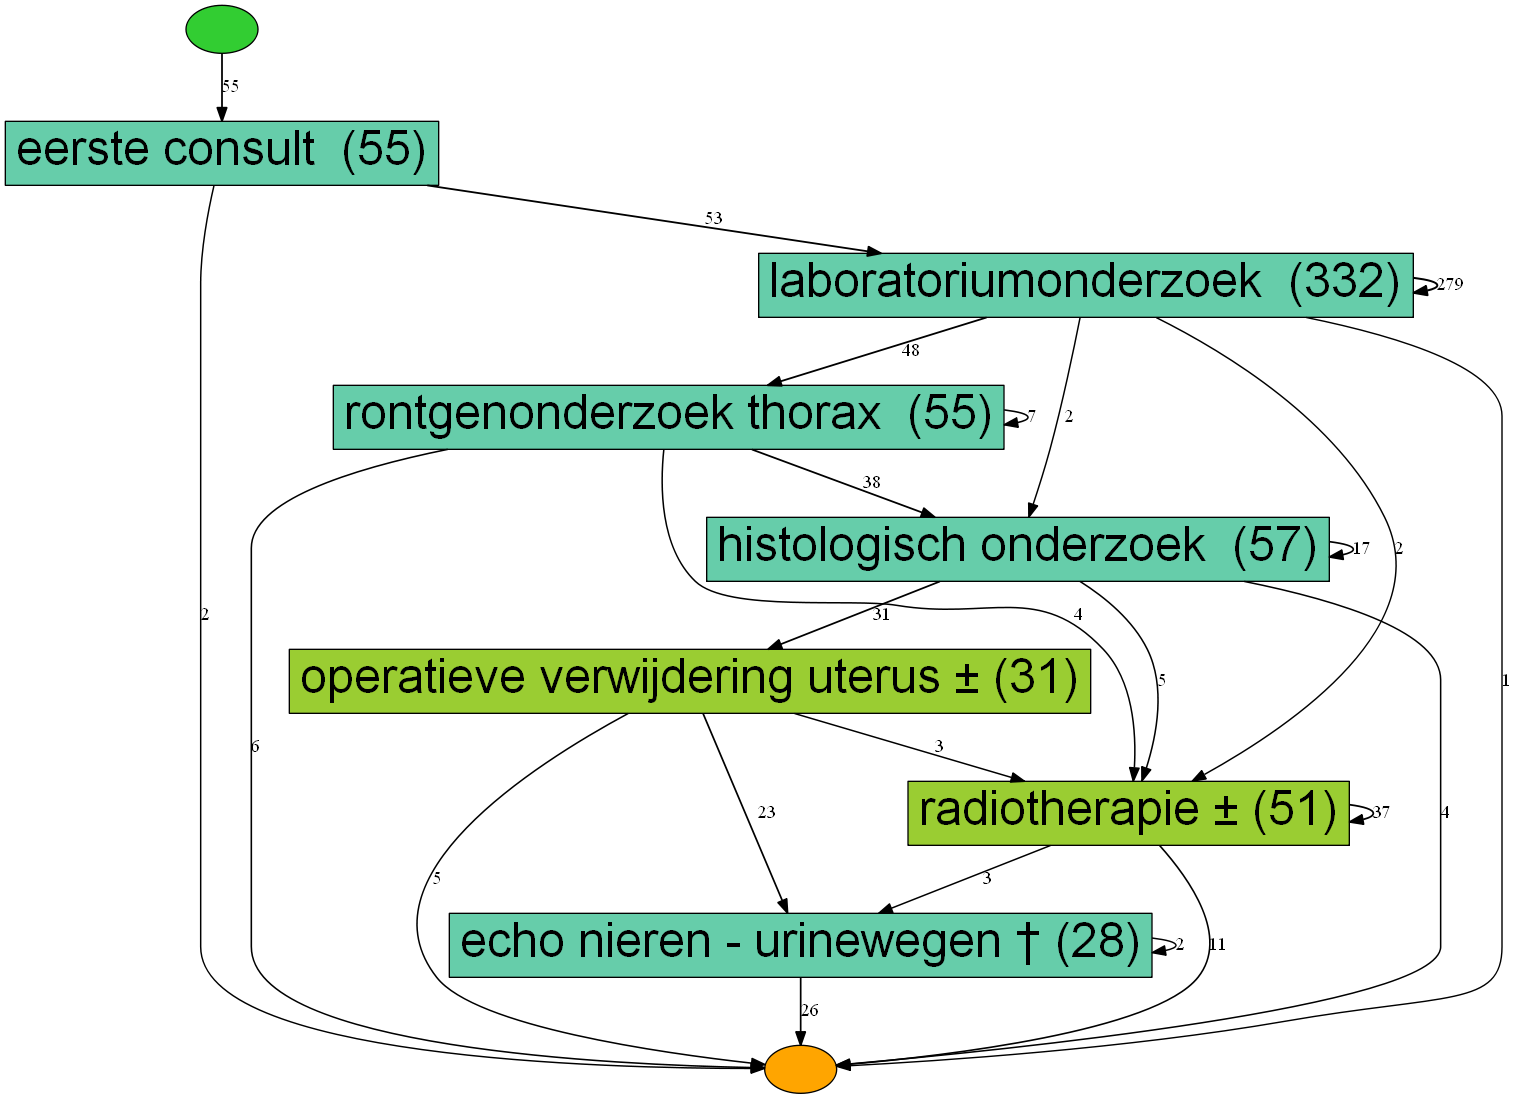

Aantal traces: 41


In [11]:
vis, table, traces = conf_extension.heu_ext(diagnoses_data, guidelines, 'conformance', min_perc = 0.25)
hn_visualizer.view(vis)
print(traces)


   behandeling
   diagnose



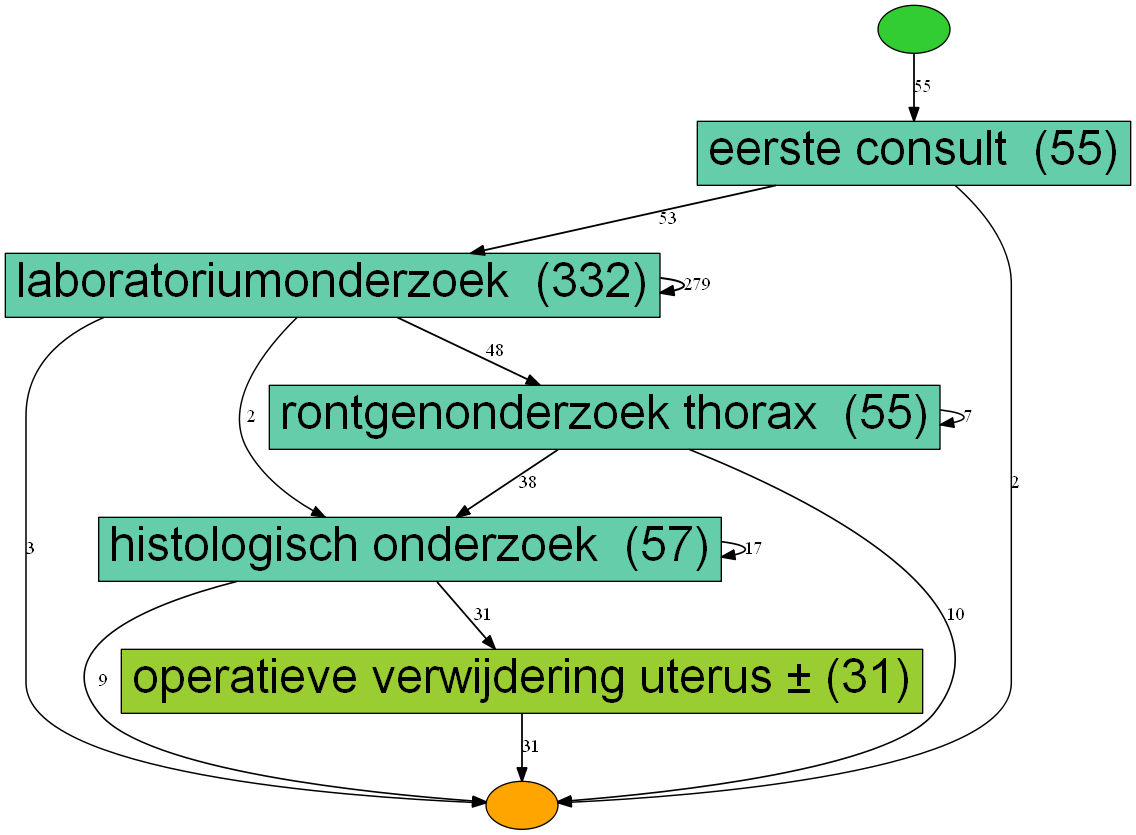

Aantal traces: 36


In [12]:
vis, table, traces = conf_extension.heu_ext(diagnoses_data, guidelines, 'conformance', min_perc = 0.5)
hn_visualizer.view(vis)
print(traces)


   diagnose



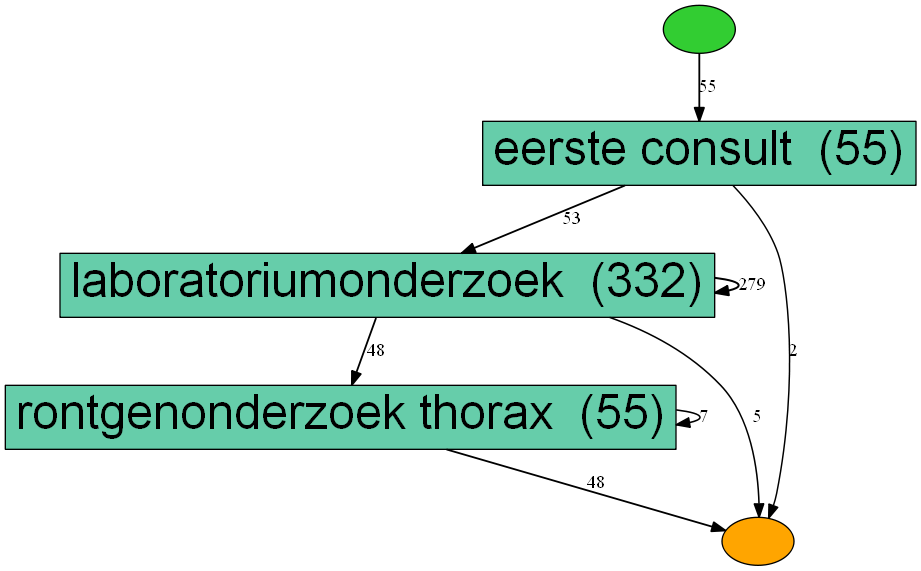

Aantal traces: 23


In [13]:
vis, table, traces = conf_extension.heu_ext(diagnoses_data, guidelines, 'conformance', min_perc = 0.75)
hn_visualizer.view(vis)
print(traces)


   diagnose



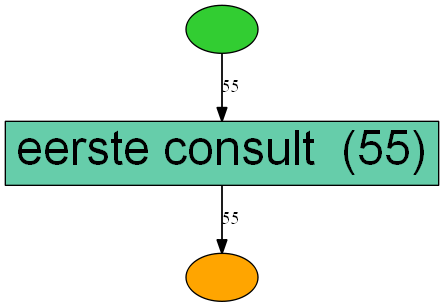

Aantal traces: 1


In [14]:
vis, table, traces = conf_extension.heu_ext(diagnoses_data, guidelines, 'conformance', min_perc = 1)
hn_visualizer.view(vis)
print(traces)

## Extension 'Business rule discovery'


   other activity
   guideline



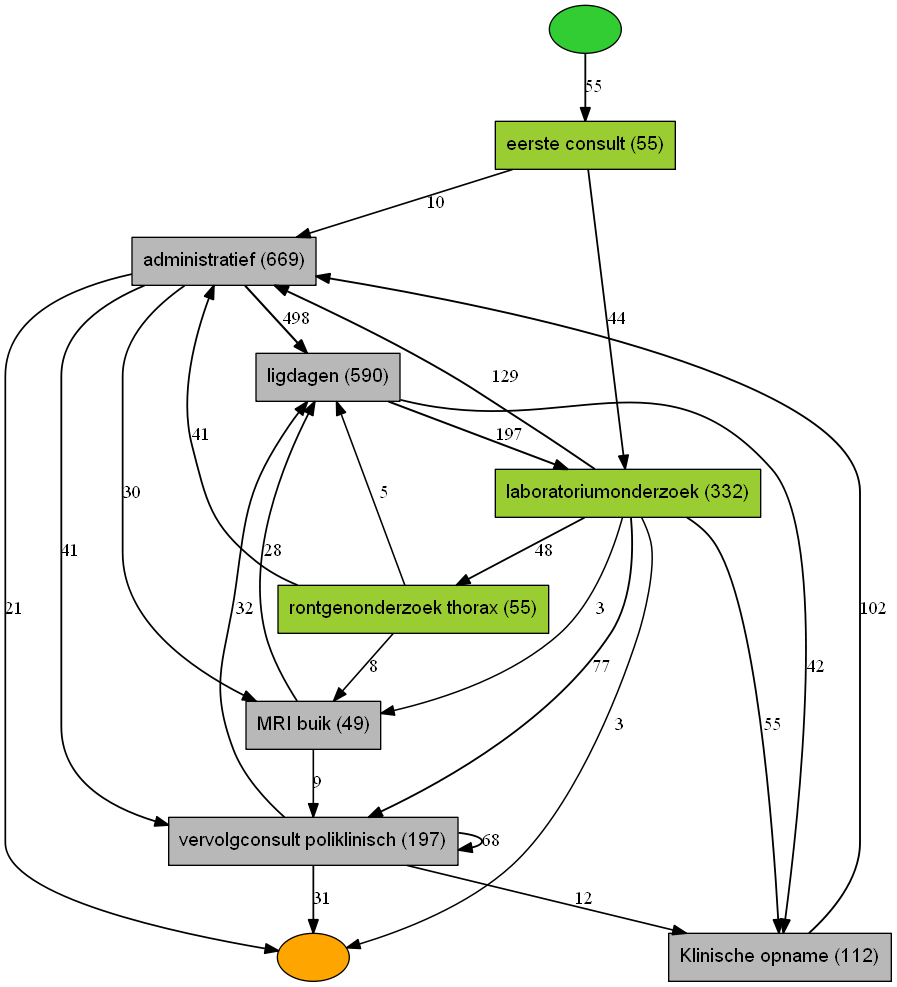

Aantal traces: 54


In [15]:
vis, table, traces = conf_extension.heu_ext(diagnoses_data, guidelines, 'business_rule', min_perc = 0.75)
hn_visualizer.view(vis)
print(traces)